# Домашнее задание №2

## Правила

 - Задание выдается и принимается через проект в LMS
 - Дедлайн сдачи - **12 октября, 23:59**. После этого времени работы не принимаются.
 - Задание выполняется индивидуально. Нельзя смотреть чужие решения или делиться своими. При обнаружении списывания результаты всех похожих работ обнуляются.
 - При возникновении вопросов по заданиям - пишите в канал "Вопросы и консультации" в Teams. Туда нельзя постить свое решение целиком. Если есть такая необходимость, то пользуйтесь личныим сообщениями в Teams.  Вам помогут **учебные ассистенты**: *Инюцина Виктория* (группы БЛГ191-192), *Кербер Екатерина* (группы БЛГ193-194), *Аветисян Наталья* (группы БЛГ195-196).
 - Аккуратно оформляйте и комментируйте свое решение. Ваша оценка зависит от того, что мы поймем из вашего блокнота.
 - С каждым заданием связано определенное количество баллов, которое отражает его сложность. Результаты суммируются. Максимально можно заработать 10 баллов.
 - На забудьте подписать работу - укажите в следующей ячейке свою фамилию, имя и группу.
 
 - На проверку надо загрузить в проект в  LMS HTML-файл с вашим решением. Чтобы получить такой файл из блокнота, сохраните блокнот, выполните команду: `Kernel/Restart & Run All`. Убедитесь, что блокнот досчитался до конца и нет ошибок. Затем выполните команду: `File/Download as.../HTML`. Полученный HTML-файл просмотрите внимательно и загрузите в задание в проект в LMS.
 
 
 
 
 
 
 

## Работа выполнена:

Фамилия, Имя: ___________


Группа: ___________

## Подготовка

Запустите следующую ячейку, чтобы подключить необходимые пакеты

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pytz
from datetime import datetime
%matplotlib inline

Запустите следующую ячейку, чтобы загрузить данные. Если у вас не загружаются данные, - убедитесь, что вы распаковали архив с домашним заданием. Необходимые файлы должны находиться в подпапке `data`.

In [3]:
# Читаем данные по рейсам
flights = pd.read_csv('data/flights.csv',
                     parse_dates=['time_hour'], # разобрать дату
                     dtype={'carrier' : 'str' # код перевозчика - текст
                           })  
# Читаем список авиакомпаний

airlines = pd.read_csv('data/airlines.csv', 
                      dtype={'carrier':'str'}) # код перевозчика - текст
airlines.rename({'name':'airline'}, axis='columns', inplace=True)


# Присоединяем авиакомпании:
flights = pd.merge(flights, airlines, on='carrier', how='left')
flights.shape


(336776, 20)

В таблице `flights` содержатся авиарейсы, вылетевшие из Нью-Йорка в 2013 году (336776 записей).

Столбцы:

 - `year, month, day` - дата вылета  
 - `dep_time, arr_time` - фактическое время вылета и посадки, время указано местное
 - `sched_dep_time, sched_arr_time` - время вылета и посадки по расписанию рейсов, местное
 - `dep_delay ,arr_delay` - задержка вылета и посадки в минутах. Отрицательные значения означают, что рейс вылетел или сел раньше  
 - `hour, minute` - отдельно час и минута времени вылета по расписанию 
 - `carrier` - краткое обозначение авиакомпании
 - `airline` - полное название авиакомпании (данные также можно посмотреть в таблице `airlines`
 - `tailnum` - бортовой номер самолета
 - `flight` - номер рейса
 - `origin, dest` - аэропорт отправления и назначения. Расшифровки есть в файле `data/airports.csv`.
 - `air_time` - время полета, в минутах
 - `distance` - расстояние перелета, в милях
 - `time_hour` - дата и время вылета в виде отметки времени, можно использовать вместе с полем `origin` для соединения с данными о погоде

In [4]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00,Delta Air Lines Inc.


В таблице `airlines` содержится список авиакомпаний

In [5]:
airlines

,carrier,airline
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


## Задача 1 (0.5 балла)

Найдите рейсы, вылетевшие в ночное время (с 00:00 до 5:59) с задержкой не менее 1 часа и наверставшие в пути более 50 минут.

Должно получиться 7 строк.

**Подсказка**:  
 - Отбор по вхождению в диапазон можно реализовать с помощью метода `between()`

In [7]:
# вылетевшие в ночное время (с 00:00 до 5:59)
filtered_flights = flights[flights['dep_time'].between(0, 599)]

# с задержкой не менее 1 часа
filtered_flights = filtered_flights[filtered_flights['dep_delay'] >= 60]

# наверставшие в пути более 50 минут
filtered_flights = filtered_flights[(filtered_flights['dep_delay'] - filtered_flights['arr_delay']) > 50]

filtered_flights.shape

(7, 20)

flights.head()

## Задача 2 (0.5 балла)

Найдите все рейсы компаний 'Delta Air Lines Inc.', 'American Airlines Inc.' и 'United Air Lines Inc.', которые вылетели в Хьюстон ('IAH' или 'HOU') летом 2013 года. При этом рейс должен был вылететь без опоздания, но совершить посадку с задержкой более 1 часа.

Должно получиться 7 строк.

**Подсказки**:  
 - Отбор по вхождению в список можно реализовать с помощью метода `isin()`  
 - Отбор по вхождению в диапазон можно реализовать с помощью метода `between()`

In [184]:
# [X]

summer_2013 = datetime(2013, 6, 1, tzinfo=pytz.UTC)
autumn_2013 = datetime(2013, 9, 1, tzinfo=pytz.UTC)

answer = flights[\
    (flights['airline'].isin(['Delta Air Lines Inc.', 'American Airlines Inc.', 'United Air Lines Inc.'])) & \
    (flights['dest'].isin(['IAH', 'HOU'])) & \
    (flights['time_hour'].between(summer_2013, autumn_2013)) & \
    (flights['dep_delay'] <= 0) & \
    (flights['arr_delay'] > 60)
]

assert len(answer) == 7

answer

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
222971,2013,6,2,512.0,515,-3.0,911.0,757,74.0,UA,261,N511UA,EWR,IAH,270.0,1400,5,15,2013-06-02 09:00:00+00:00,United Air Lines Inc.
227421,2013,6,6,1632.0,1633,-1.0,2017.0,1916,61.0,UA,1178,N18112,EWR,IAH,264.0,1400,16,33,2013-06-06 20:00:00+00:00,United Air Lines Inc.
244309,2013,6,24,1526.0,1529,-3.0,1927.0,1814,73.0,UA,1192,N75429,EWR,IAH,189.0,1400,15,29,2013-06-24 19:00:00+00:00,United Air Lines Inc.
250684,2013,7,1,858.0,859,-1.0,1318.0,1151,87.0,UA,430,N424UA,LGA,IAH,195.0,1416,8,59,2013-07-01 12:00:00+00:00,United Air Lines Inc.
258316,2013,7,9,1721.0,1721,0.0,2142.0,2001,101.0,UA,1712,N39415,EWR,IAH,173.0,1400,17,21,2013-07-09 21:00:00+00:00,United Air Lines Inc.
271770,2013,7,23,1733.0,1735,-2.0,2134.0,2030,64.0,AA,1901,N3HHAA,JFK,IAH,208.0,1417,17,35,2013-07-23 21:00:00+00:00,American Airlines Inc.
292992,2013,8,14,1625.0,1625,0.0,2011.0,1908,63.0,UA,1695,N19136,EWR,IAH,243.0,1400,16,25,2013-08-14 20:00:00+00:00,United Air Lines Inc.


## Задача 3 (0.5 балла)

Сколько рейсов в Питтсбург ('PIT') отменили в сентябре 2013 года? 

Должно получиться 5 строк.

**Подсказка:**  
 - Для отмененных рейсов время вылета не указано.

In [185]:
# [X]

september_2013 = datetime(2013, 9, 1, tzinfo=pytz.UTC)
october_2013 = datetime(2013, 10, 1, tzinfo=pytz.UTC)

answer = flights[
    (flights['dest'] == 'PIT') & \
    (flights['dep_time'].isna()) & \
    (flights['time_hour'].between(september_2013, october_2013))
]

assert len(answer) == 5 

answer

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
310785,2013,9,2,NaN,1600,NaN,NaN,1747,NaN,EV,5091,N750EV,LGA,PIT,NaN,335,16,0,2013-09-02 20:00:00+00:00,ExpressJet Airlines Inc.
312749,2013,9,4,NaN,1305,NaN,NaN,1438,NaN,EV,5378,N744EV,LGA,PIT,NaN,335,13,5,2013-09-04 17:00:00+00:00,ExpressJet Airlines Inc.
320037,2013,9,12,NaN,1820,NaN,NaN,2000,NaN,EV,5503,N615QX,LGA,PIT,NaN,335,18,20,2013-09-12 22:00:00+00:00,ExpressJet Airlines Inc.
321162,2013,9,13,NaN,655,NaN,NaN,824,NaN,9E,3496,NaN,LGA,PIT,NaN,335,6,55,2013-09-13 10:00:00+00:00,Endeavor Air Inc.
327662,2013,9,20,NaN,655,NaN,NaN,824,NaN,9E,3496,NaN,LGA,PIT,NaN,335,6,55,2013-09-20 10:00:00+00:00,Endeavor Air Inc.


## Задача 4 (0.5 балла)

В наборе данных время вылета находится в неудобном формате: часы и минуты собраны в одно целое число. Поэтому, например, после значения 1359 будет идти значение 1400. Ваша задача - вычислить три новых поля: `dep_hour`, `dep_minute` и `dep_minutes_since_midnight`.  Поля должны содержать, соответственно, час вылета, минуту вылета и количество минут с полуночи до вылета.

Выведите таблицу с рассчитанными столбцами (первые 10 строк). Убедитесь, что их видно в выводе.

В отдельной ячейке посчитайте и выведите суммы по трем рассчитанным полям.

**Подсказка:**  
 
 - Воспользуйтесь операцией целочисленного деления `//` и взятия остатка от деления `%`. Например, `1359 // 100 = 13`, а `1359 % 100 = 59`.  

In [186]:
# [X]

flights['dep_hour'] = flights['dep_time'] // 100
flights['dep_minute'] = flights['dep_time'] % 100
flights['dep_minutes_since_midnight'] = flights['dep_hour'] * 60 + flights['dep_minute']

flights.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dest,air_time,distance,hour,minute,time_hour,airline,dep_hour,dep_minute,dep_minutes_since_midnight
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00,United Air Lines Inc.,5.0,17.0,317.0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00,United Air Lines Inc.,5.0,33.0,333.0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00,American Airlines Inc.,5.0,42.0,342.0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00,JetBlue Airways,5.0,44.0,344.0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00,Delta Air Lines Inc.,5.0,54.0,354.0
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,...,ORD,150.0,719,5,58,2013-01-01 10:00:00+00:00,United Air Lines Inc.,5.0,54.0,354.0
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,...,FLL,158.0,1065,6,0,2013-01-01 11:00:00+00:00,JetBlue Airways,5.0,55.0,355.0
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,...,IAD,53.0,229,6,0,2013-01-01 11:00:00+00:00,ExpressJet Airlines Inc.,5.0,57.0,357.0
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,...,MCO,140.0,944,6,0,2013-01-01 11:00:00+00:00,JetBlue Airways,5.0,57.0,357.0
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,...,ORD,138.0,733,6,0,2013-01-01 11:00:00+00:00,American Airlines Inc.,5.0,58.0,358.0


## Задача 5 (0.5 балла)

Некоторые рейсы были отменены. Для таких рейсов в столбце `dep_time` содержится пропущенное значение. Вычислите новый столбец: `status`, который, в зависимости от времени задержки вылета, должен содержать одно из следующих значений: `вылетел вовремя`, `задержан`, `отменен`. Для упрощения расчета, примите, что те рейсы, которые вылетели раньше назначенного времени, также относятся к категории: `вылетел вовремя`.

Выведите таблицу с рейсами (первые 10 строк). Убедитесь что поле со статусом видно в выводе.


В отдельной ячейке посчитайте и выведите количество рейсов для каждого статуса.

In [191]:
# [X]

# т.к. таких записей нет, это значит что если dep_time это NaN то и dep_delay это Nan и наоборот.
# поэтому может использовать только поле dep_delay 
flights[flights['dep_delay'].isna() & flights['dep_time'].notna()] # нет таких записей
flights[flights['dep_delay'].notna() & flights['dep_time'].isna()] # нет таких записей


flights['status'] = flights['dep_delay'].apply(lambda x: 'вылетел вовремя' if x <= 0 else 'задержан')
flights.loc[flights['dep_delay'].isna(), 'status'] = 'отменен'

flights.head(10)

status
вылетел вовремя    200089
задержан           128432
отменен              8255
dtype: int64

In [192]:
flights.groupby('status').size()

status
вылетел вовремя    200089
задержан           128432
отменен              8255
dtype: int64

## __Задача 6 (0.5 балла)__

Рассчитайте и выведите долю задержанных рейсов по всей таблице `flights`.

In [193]:
# [X]

# количество задержанные рейсов к количеству всех полетов
flights.groupby('status').size()['задержан'] / len(flights)

0.3813573413782455

## Задача 7 (1 балл)

Составьте рейтинг авиакомпаний по вероятности отмены рейса. Самые надежные авиакомпании должны быть первыми в списке.

In [195]:
# [X]

chances_to_cancel = (flights[flights['status'] == 'отменен'].groupby('airline').size()) / (flights.groupby('airline').size())
# если есть NaN, то значит этих комнатий нет в `flights['status'] == 'canceled'`
chances_to_cancel[chances_to_cancel.isna()] = 0
chances_to_cancel.sort_values()

airline
Hawaiian Airlines Inc.         0.000000
Alaska Airlines Inc.           0.002801
Frontier Airlines Inc.         0.004380
Virgin America                 0.006005
Delta Air Lines Inc.           0.007254
JetBlue Airways                0.008529
United Air Lines Inc.          0.011694
Southwest Airlines Co.         0.015642
American Airlines Inc.         0.019432
AirTran Airways Corporation    0.022393
US Airways Inc.                0.032285
Envoy Air                      0.046748
ExpressJet Airlines Inc.       0.052000
Endeavor Air Inc.              0.056555
Mesa Airlines Inc.             0.093178
SkyWest Airlines Inc.          0.093750
dtype: float64

## Задача 8 (1 балл)

Определите, какой месяц оказался самым тяжелым для каждой авиакомпании (по доле рейсов, задержанных более чем на 15 минут).

Выведите таблицу со столбцами: `airline`, `month`.


In [196]:
# [X]

# создаем новую таблицу для удобства
temp_flights = flights.loc[:, ['dep_delay', 'airline', 'month']]
# делаем колонну с именами месяцев
temp_flights['month_name'] = temp_flights['month'].apply(lambda x: datetime(2013, x, 1).strftime('%B'))

# оставляем только полеты задержанные на >15 минут
temp_flights = temp_flights[temp_flights['dep_delay'] > 15]
# группируем и ищем моду по полю month. Затем переводим ряд в таблицу
temp_flights.groupby('airline')['month_name'].apply(lambda x: x.mode()[0]).to_frame('month')



,month
airline,
AirTran Airways Corporation,June
Alaska Airlines Inc.,December
American Airlines Inc.,June
Delta Air Lines Inc.,July
Endeavor Air Inc.,July
Envoy Air,July
ExpressJet Airlines Inc.,March
Frontier Airlines Inc.,July
Hawaiian Airlines Inc.,February


## Задача 9 (1 балл)

Постройте рейтинг авиакомпаний по числу выполненных рейсов в виде столбиковой диаграммы с горизонтальными столбиками. Столбики на диаграмме должны располагаться по убыванию. Добавьте понятное название графика и подпишите оси на русском языке.

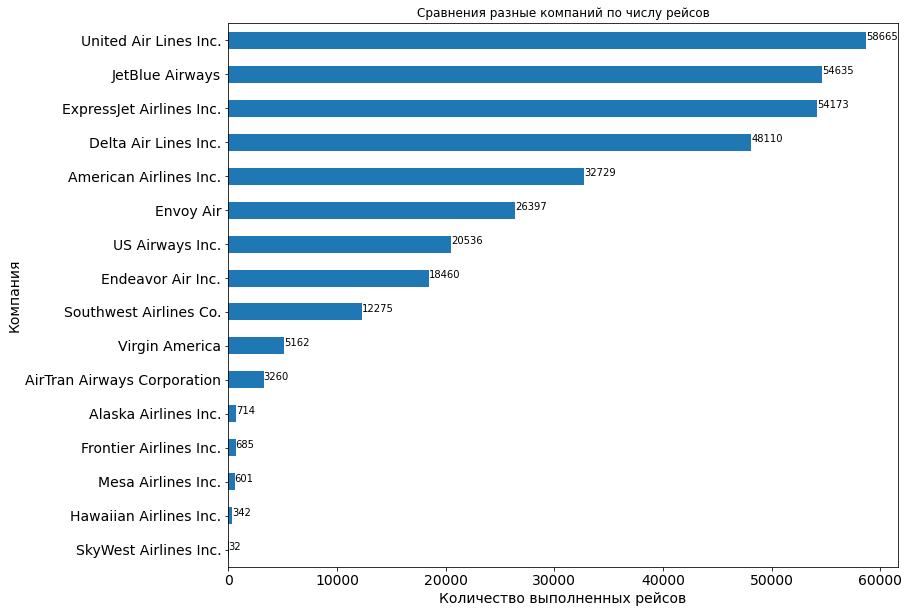

In [197]:
def draw_series(series, title, x_label, y_label, fontsize=14):
    # рисует график ряда

    ax = series.plot(kind='barh', fontsize=fontsize, figsize=(12, 10))
    for index, value in enumerate(series):
        plt.text(value, index, str(value))
    
    ax.set_xlabel(x_label, size=fontsize)
    ax.set_ylabel(y_label, size=fontsize)
    ax.set_title(title)
    plt.show()

s = flights.groupby('airline').size().sort_values()
draw_series(s, 'Сравнения разные компаний по числу рейсов', 'Количество выполненных рейсов', 'Компания')


## Задача 10 (1.5 балла)

Постройте тепловую карту задержки вылета (строки - дни недели, столбцы - час вылета по расписанию, в ячейках - средняя задержка вылета в минутах). Добавьте понятное название графика и подпишите оси на русском языке.

Сравните этот результат с загруженностью аэропортов, построив аналогичную тепловую карту с количеством рейсов.


Напишите выводы:

 - В какие дни и часы загруженность аэропорта наибольшая?
 - В какие дни и часы задержка вылетов наибольшая?
 - Соотносится ли задержка вылета с загруженностью аэропорта?

**Подсказки**:

- Номер дня недели для столбца с датами доступен через свойство `dt.dayofweek`. `0` - понедельник, `6` - воскресенье.

In [198]:
def draw_heatmap(df, x_label, y_label, title):
    fig, ax = plt.subplots(figsize=(12, 6))
    # https://stackoverflow.com/questions/12286607/making-heatmap-from-pandas-dataframe
    ax = sns.heatmap(df, cmap='RdYlGn_r')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)


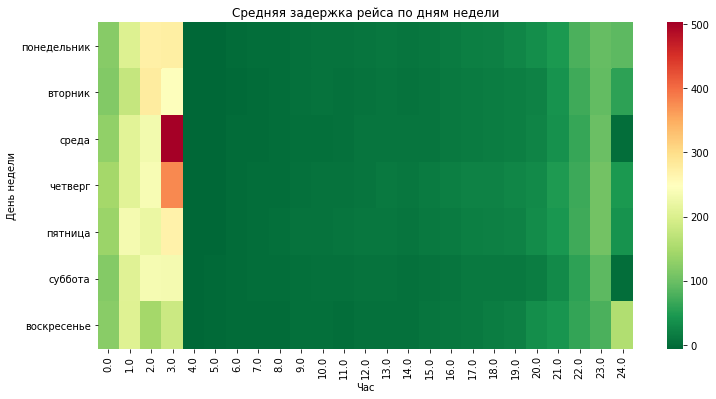

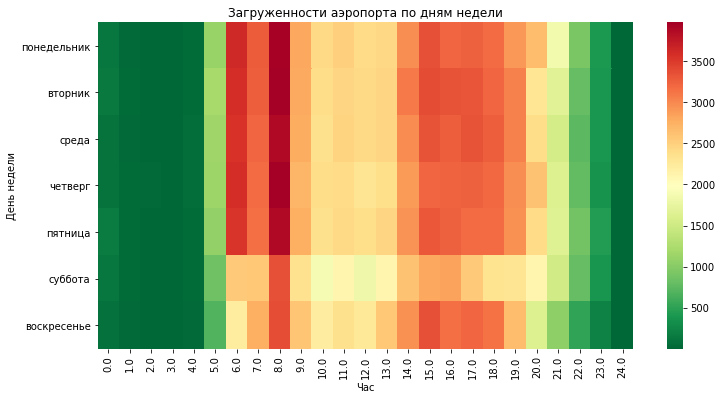

In [199]:
# не очень понятно какой из этих двух df_dep_delay использовать
df_dep_delay = flights.groupby([flights['time_hour'].dt.dayofweek, flights['dep_time']//100])['dep_delay'].mean().unstack()
#df_dep_delay = flights.groupby([flights['time_hour'].dt.dayofweek, flights['time_hour'].dt.hour])['dep_delay'].mean().unstack()

# не очень понятной какой из этих двух df_size использовать
df_size = flights.groupby([flights['time_hour'].dt.dayofweek, flights['dep_time']//100]).size().unstack()
#df_size = flights.groupby([flights['time_hour'].dt.dayofweek, flights['time_hour'].dt.hour]).size().unstack()

days_of_week = {
    0: 'понедельник', 
    1: 'вторник', 
    2: 'среда',
    3: 'четверг',
    4: 'пятница',
    5: 'суббота',
    6: 'воскресенье',
    }
df_dep_delay.index = df_dep_delay.index.map(days_of_week)
df_size.index = df_size.index.map(days_of_week)

draw_heatmap(df_dep_delay, 'Час', 'День недели', 'Средняя задержка рейса по дням недели')
draw_heatmap(df_size, 'Час', 'День недели', 'Загруженности аэропорта по дням недели')


In [174]:
# в таблице только одна запить со средой и dep_time в 3 часа ночи. из-за этого есть красная точка на первом графике
flights[(flights['time_hour'].dt.dayofweek == 2) & (flights['dep_time']//100 == 3.0)]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
97934,2013,12,17,353.0,1930,503.0,500.0,2047,493.0,EV,5714,N909EV,JFK,IAD,44.0,228,19,30,2013-12-18 00:00:00+00:00,ExpressJet Airlines Inc.


 - В какие дни и часы загруженность аэропорта наибольшая?
    + будни дни
    + в 11, 12, 13, 21, 
 - В какие дни и часы задержка вылетов наибольшая?
    + вечер четверга
    + 
 - Соотносится ли задержка вылета с загруженностью аэропорта?
    + c 4-9 часов графики имеют явную зависимость.
    + 

In [253]:
# Пример:
s = pd.date_range('2020-10-05', '2020-10-11', freq='D').to_series()
s.dt.dayofweek

2020-10-05    0
2020-10-06    1
2020-10-07    2
2020-10-08    3
2020-10-09    4
2020-10-10    5
2020-10-11    6
Freq: D, dtype: int64

 - Чтобы обеспечить правильный порядок дней недели, при группировке необходимо воспользоваться номером дня недели. Но в результате получится, что заголовки строк таблицы будут числами. Их можно заменить на названия дней, применив к индексу словарь замен с помощью метода `map()`:

In [254]:
# Пример
s = pd.Series(range(1, 4))
s # Сейчас индекс - целые числа

0    1
1    2
2    3
dtype: int64

In [255]:
# Пример
replacements = { 0 : 'первый', 1 : 'второй', 2 : 'третий'} # словарь замен для примера

s.index = s.index.map(replacements)
s # Сейчас числа в индексе заменены на слова по словарю замен

первый    1
второй    2
третий    3
dtype: int64

## Задача 11 (1 балл)

Постройте графики изменения вероятности задержки рейса более чем на полчаса для 5 крупнейших по количеству рейсов авиакомпаний.
Вероятность задержки рейса можно оценить как долю задержанных рейсов данной авиакомпании в данном месяце.

Примерный вид графика показан на рисунке:
![](photo.jpg)

Напишите вывод:

 - Одинаковы ли тренды в задержке рейсов для разных авиакомпаний?
    + в основном да, но иногда присутвуют отклонения
 - Какие авиакомпании наиболее и наименее надежные с точки зрения вероятности задержки рейса?
   + надежные - Americam Airlines Inc. , Delta Air Lines inc
   + менее надежные - United Air Lines Inc.


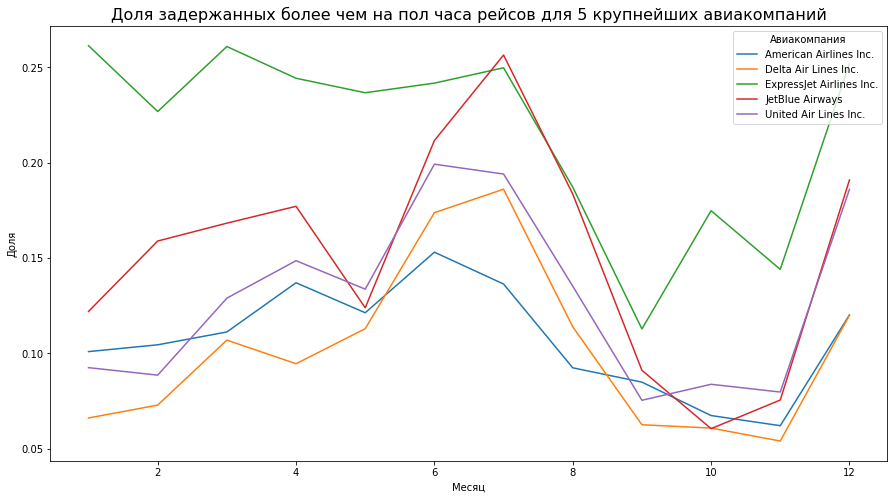

In [230]:
# оставляем только 5 крупнейших компаний
only_big_airlines = flights[flights['airline'].isin(flights.groupby('airline').size().nlargest(5).index)]

df = (only_big_airlines[only_big_airlines['dep_delay'] > 30].groupby(['airline', 'month']).size() / only_big_airlines.groupby(['airline', 'month']).size()).unstack()

fontsize = 10

for i in range(len(df)):
    ax = df.iloc[i].plot(fontsize=fontsize, figsize=(15, 8))
    ax.legend(df.index, title='Авиакомпания', loc=1)
    ax.set_xlabel('Месяц', fontsize=fontsize)
    ax.set_ylabel('Доля', fontsize=fontsize)
    ax.set_title('Доля задержанных более чем на пол часа рейсов для 5 крупнейших авиакомпаний', fontsize=16)

## Задача 12 (1.5 балла)

Загрузим данные о самолетах:

In [256]:
planes = pd.read_csv('data/planes.csv')

In [257]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [124]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB



**Словарь данных**  

 - `tailnum` - бортовой номер
 - `year` - год выпуска
 - `type` - тип самолета
 - `manufacturer, model` - производитель и модель самолета
 - `engines, seats` - количество двигателей и пассажирских мест
 - `speed` - средняя крейсерская скорость, миль в час
 - `engine` - тип двигателя

**Задание**:

 - Соедините данные о самолетах `planes` с данными о рейсах `flights`. Выведите первые 10 строк этой таблицы и сводку по таблице (`info()`). Напишите вывод, отличается ли количество строк в полученной таблице и в таблице `flights`. С чем это связано?
 - На основе столбцов `distance` (расстояние в милях) и `air_time` (время полета в минутах) рассчитайте среднюю скорость самолета,  выполнявшего рейс (в милях/час)
 - Рассчитайте среднюю скорость в воздухе для каждого производителя и модели самолета. 
 - Получите таблицу с тремя самыми быстрыми самолетами (или вертолетами) каждого производителя. Выведите эти данные как таблицу (целиком). В таблице не должно быть производителей, у которых представлено в данных менее трех моделей.
 - Визуализируйте данные полученной таблицы с помощью подходящего графика. Добавьте понятное название графика и подпишите оси.

In [259]:
flights.head()

flights_and_planes = planes.merge(flights, on='tailnum')

flights_and_planes.head(10)

,tailnum,year_x,type,manufacturer,model,engines,seats,speed,engine,year_y,...,air_time,distance,hour,minute,time_hour,airline,dep_hour,dep_minute,dep_minutes_since_midnight,status
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,60.0,319,6,30,2013-01-10 11:00:00+00:00,ExpressJet Airlines Inc.,6.0,26.0,386.0,вылетел вовремя
1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,99.0,628,10,32,2013-01-10 15:00:00+00:00,ExpressJet Airlines Inc.,11.0,20.0,680.0,задержан
2,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,175.0,1008,15,40,2013-01-10 20:00:00+00:00,ExpressJet Airlines Inc.,16.0,19.0,979.0,задержан
3,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,81.0,463,6,34,2013-01-11 11:00:00+00:00,ExpressJet Airlines Inc.,6.0,32.0,392.0,вылетел вовремя
4,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,171.0,1092,11,20,2013-01-11 16:00:00+00:00,ExpressJet Airlines Inc.,11.0,16.0,676.0,вылетел вовремя
5,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,49.0,284,18,19,2013-01-11 23:00:00+00:00,ExpressJet Airlines Inc.,18.0,45.0,1125.0,задержан
6,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,84.0,488,8,38,2013-01-12 13:00:00+00:00,ExpressJet Airlines Inc.,8.0,30.0,510.0,вылетел вовремя
7,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,88.0,628,13,59,2013-01-12 18:00:00+00:00,ExpressJet Airlines Inc.,14.0,10.0,850.0,задержан
8,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,101.0,569,15,36,2013-01-13 20:00:00+00:00,ExpressJet Airlines Inc.,15.0,51.0,951.0,задержан
9,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan,2013,...,39.0,209,20,39,2013-01-14 01:00:00+00:00,ExpressJet Airlines Inc.,22.0,21.0,1341.0,задержан


In [260]:
flights_and_planes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284170 entries, 0 to 284169
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   tailnum                     284170 non-null  object             
 1   year_x                      278864 non-null  float64            
 2   type                        284170 non-null  object             
 3   manufacturer                284170 non-null  object             
 4   model                       284170 non-null  object             
 5   engines                     284170 non-null  int64              
 6   seats                       284170 non-null  int64              
 7   speed                       963 non-null     float64            
 8   engine                      284170 non-null  object             
 9   year_y                      284170 non-null  int64              
 10  month                       284170 non-null 

In [261]:
# размеры отличаются. В flights больше записей
print(flights.shape, flights_and_planes.shape)
# это происходит потому что не все номера самолетов есть в таблице planes
flights.groupby('tailnum').size().count() > planes.groupby('tailnum').size().count()

(336776, 24) (284170, 32)


True

In [262]:
#  На основе столбцов `distance` (расстояние в милях) и `air_time` (время полета в минутах) рассчитайте среднюю скорость самолета,  выполнявшего рейс (в милях/час)

flights_and_planes['speed'] = flights_and_planes['distance'] * (60 / flights_and_planes['air_time'])
flights_and_planes.head()

,tailnum,year_x,type,manufacturer,model,engines,seats,speed,engine,year_y,...,air_time,distance,hour,minute,time_hour,airline,dep_hour,dep_minute,dep_minutes_since_midnight,status
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,319.000000,Turbo-fan,2013,...,60.0,319,6,30,2013-01-10 11:00:00+00:00,ExpressJet Airlines Inc.,6.0,26.0,386.0,вылетел вовремя
1,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,380.606061,Turbo-fan,2013,...,99.0,628,10,32,2013-01-10 15:00:00+00:00,ExpressJet Airlines Inc.,11.0,20.0,680.0,задержан
2,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,345.600000,Turbo-fan,2013,...,175.0,1008,15,40,2013-01-10 20:00:00+00:00,ExpressJet Airlines Inc.,16.0,19.0,979.0,задержан
3,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,342.962963,Turbo-fan,2013,...,81.0,463,6,34,2013-01-11 11:00:00+00:00,ExpressJet Airlines Inc.,6.0,32.0,392.0,вылетел вовремя
4,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,383.157895,Turbo-fan,2013,...,171.0,1092,11,20,2013-01-11 16:00:00+00:00,ExpressJet Airlines Inc.,11.0,16.0,676.0,вылетел вовремя


In [263]:
# Рассчитайте среднюю скорость в воздухе для каждого производителя и модели самолета.
flights_and_planes.groupby(['manufacturer', 'model'])['speed'].mean()

manufacturer            model      
AGUSTA SPA              A109E          430.797629
AIRBUS                  A319-112       449.793559
                        A319-114       399.411739
                        A319-115       455.189030
                        A319-131       396.737222
                                          ...    
PIPER                   PA-32RT-300    445.507731
ROBINSON HELICOPTER CO  R66            427.306707
SIKORSKY                S-76A          430.214426
STEWART MACO            FALCON XP      449.760827
                        FALCON-XP      409.154493
Name: speed, Length: 147, dtype: float64

In [297]:
# Получите таблицу с тремя самыми быстрыми самолетами (или вертолетами) каждого производителя. Выведите эти данные как таблицу (целиком). В таблице не должно быть производителей, у которых представлено в данных менее трех моделей.

#only_big_manufacturers = flights_and_planes[flights_and_planes['manufacturer'].isin(flights_and_planes.groupby('manufacturer').filter(lambda x: len(x)>=3))]
#flights_and_planes.groupby('manufacturer').size()[flights_and_planes.groupby('manufacturer').size() >= 3]


flights_and_planes.groupby(['manufacturer', 'model'])

manufacturer  model            
BOEING        757-232    196559    703.384615
EMBRAER       EMB-145XR  43862     650.322581
              EMB-145LR  26974     648.000000
Name: speed, dtype: float64